# IMPORT LIBRARIES & DATASET

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyoff

from datetime import datetime

from scipy.stats import skew
from scipy.stats import kurtosis

# Ignores any warning
import warnings
warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if round(x,0) == x else '{:.3f}'.format(x)

# from matplotlib import rcParams
# rcParams['figure.figsize'] = 12, 4
# rcParams['lines.linewidth'] = 3
# rcParams['xtick.labelsize'] = 'x-large'
# rcParams['ytick.labelsize'] = 'x-large'

import matplotlib as mp
%matplotlib inline
import textwrap
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/Clicked Ads Dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [ ]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.950,35,432837300,256.090,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.230,31,479092950.000,193.770,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.470,26,418501580,236.500,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.150,29,383643260,245.890,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.370,35,517229930.000,225.580,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [ ]:
num_cols = ['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']
cat_cols = ['Male','Clicked on Ad','city','province','category']
datetime = ['Timestamp']

### About Dataset

- 'Daily Time Spent on Site': consumer time on site in minutes
- 'Age': cutomer age in years
- 'Area Income': Avg. Income of geographical area of consumer
- 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
- 'Male': Gender customer
- 'Timestamp': Time at which consumer clicked on Ad or closed window
- 'Clicked on Ad': 0 or 1 indicated clicking on Ad
- 'City': City of consumer
- 'Province' : Province of Consumer
- 'category': Headline of the advertisement

# EXPLORATORY DATA ANALYSIS

In [ ]:
df.describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000,987,1000,987,989
mean,499.500,64.930,36.009,384864670.638,179.864
std,288.819,15.845,8.786,94079989.569,43.870
min,0,32.600,19,97975500,104.780
25%,249.750,51.270,29,328632990,138.710
50%,499.500,68.110,35,399068320,182.650
75%,749.250,78.460,42,458355450,218.790
max,999,91.430,61,556393600,267.010


In [ ]:
df.select_dtypes(include='object').describe()

,Male,Timestamp,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000,1000
unique,2,997,2,30,16,10
top,Perempuan,5/26/2016 15:40,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,500,64,253,112


### Duplicated Data

In [ ]:
df.duplicated().sum()

0

### Null Values

In [ ]:
df.isna().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [ ]:
del df['Unnamed: 0']

## Univariate Analysis

### Boxplot

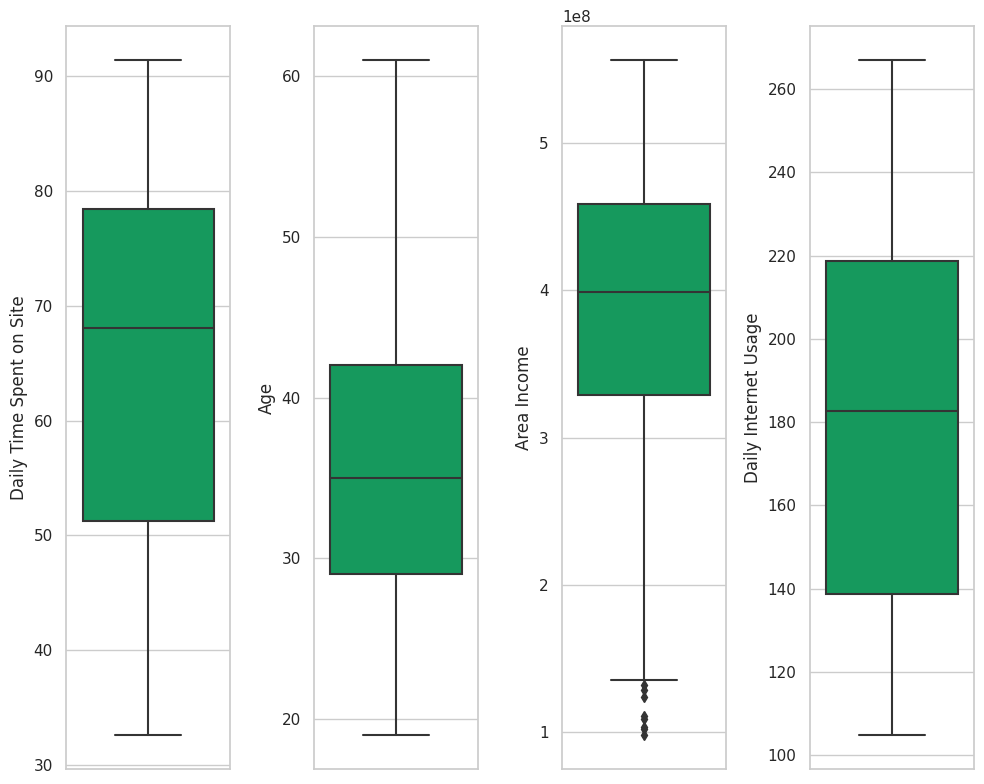

In [ ]:
plt.figure(figsize=(10, 8))
n = 1
for i in range(0, len(num_cols)):
    plt.subplot(n, math.ceil(len(num_cols)/n), i+1)
    sns.boxplot(y=df[num_cols[i]], color='#00af5f', orient='v')
    plt.tight_layout()

outliers have been found in the 'area income' column, so for the next stage, the outliers can be removed.

### Violin Plot

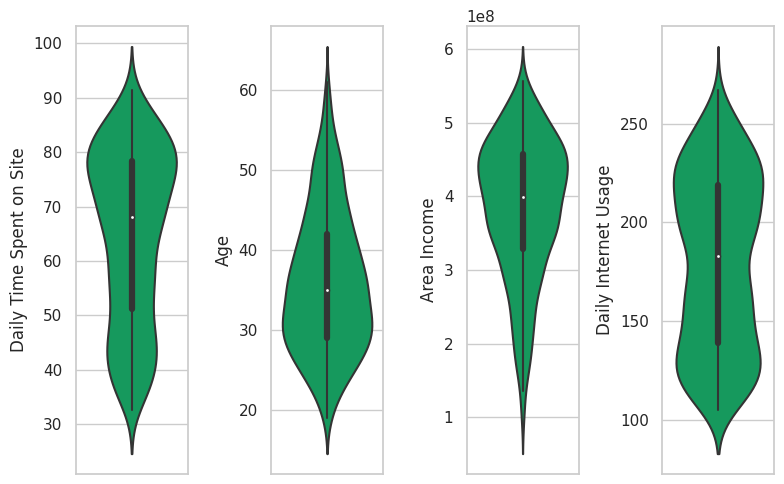

In [ ]:
plt.figure(figsize=(8, 5))
n = 1
for i in range(0, len(num_cols)):
    plt.subplot(n, math.ceil(len(num_cols)/n), i+1)
    sns.violinplot(y=df[num_cols[i]], color='#00af5f',orient='v')
    plt.tight_layout()

### Histogram Plot

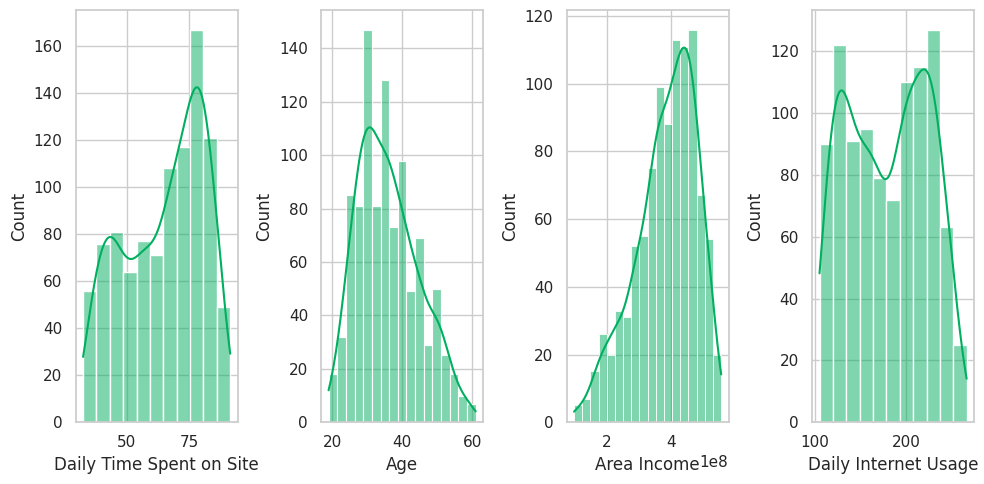

In [ ]:
plt.figure(figsize=(10, 5))
n = 1
for i in range(0, len(num_cols)):
    plt.subplot(n, math.ceil(len(num_cols)/n), i+1)
    sns.histplot(df[num_cols[i]], color='#00af5f', kde=True)
    plt.tight_layout()

### Individual Countplot

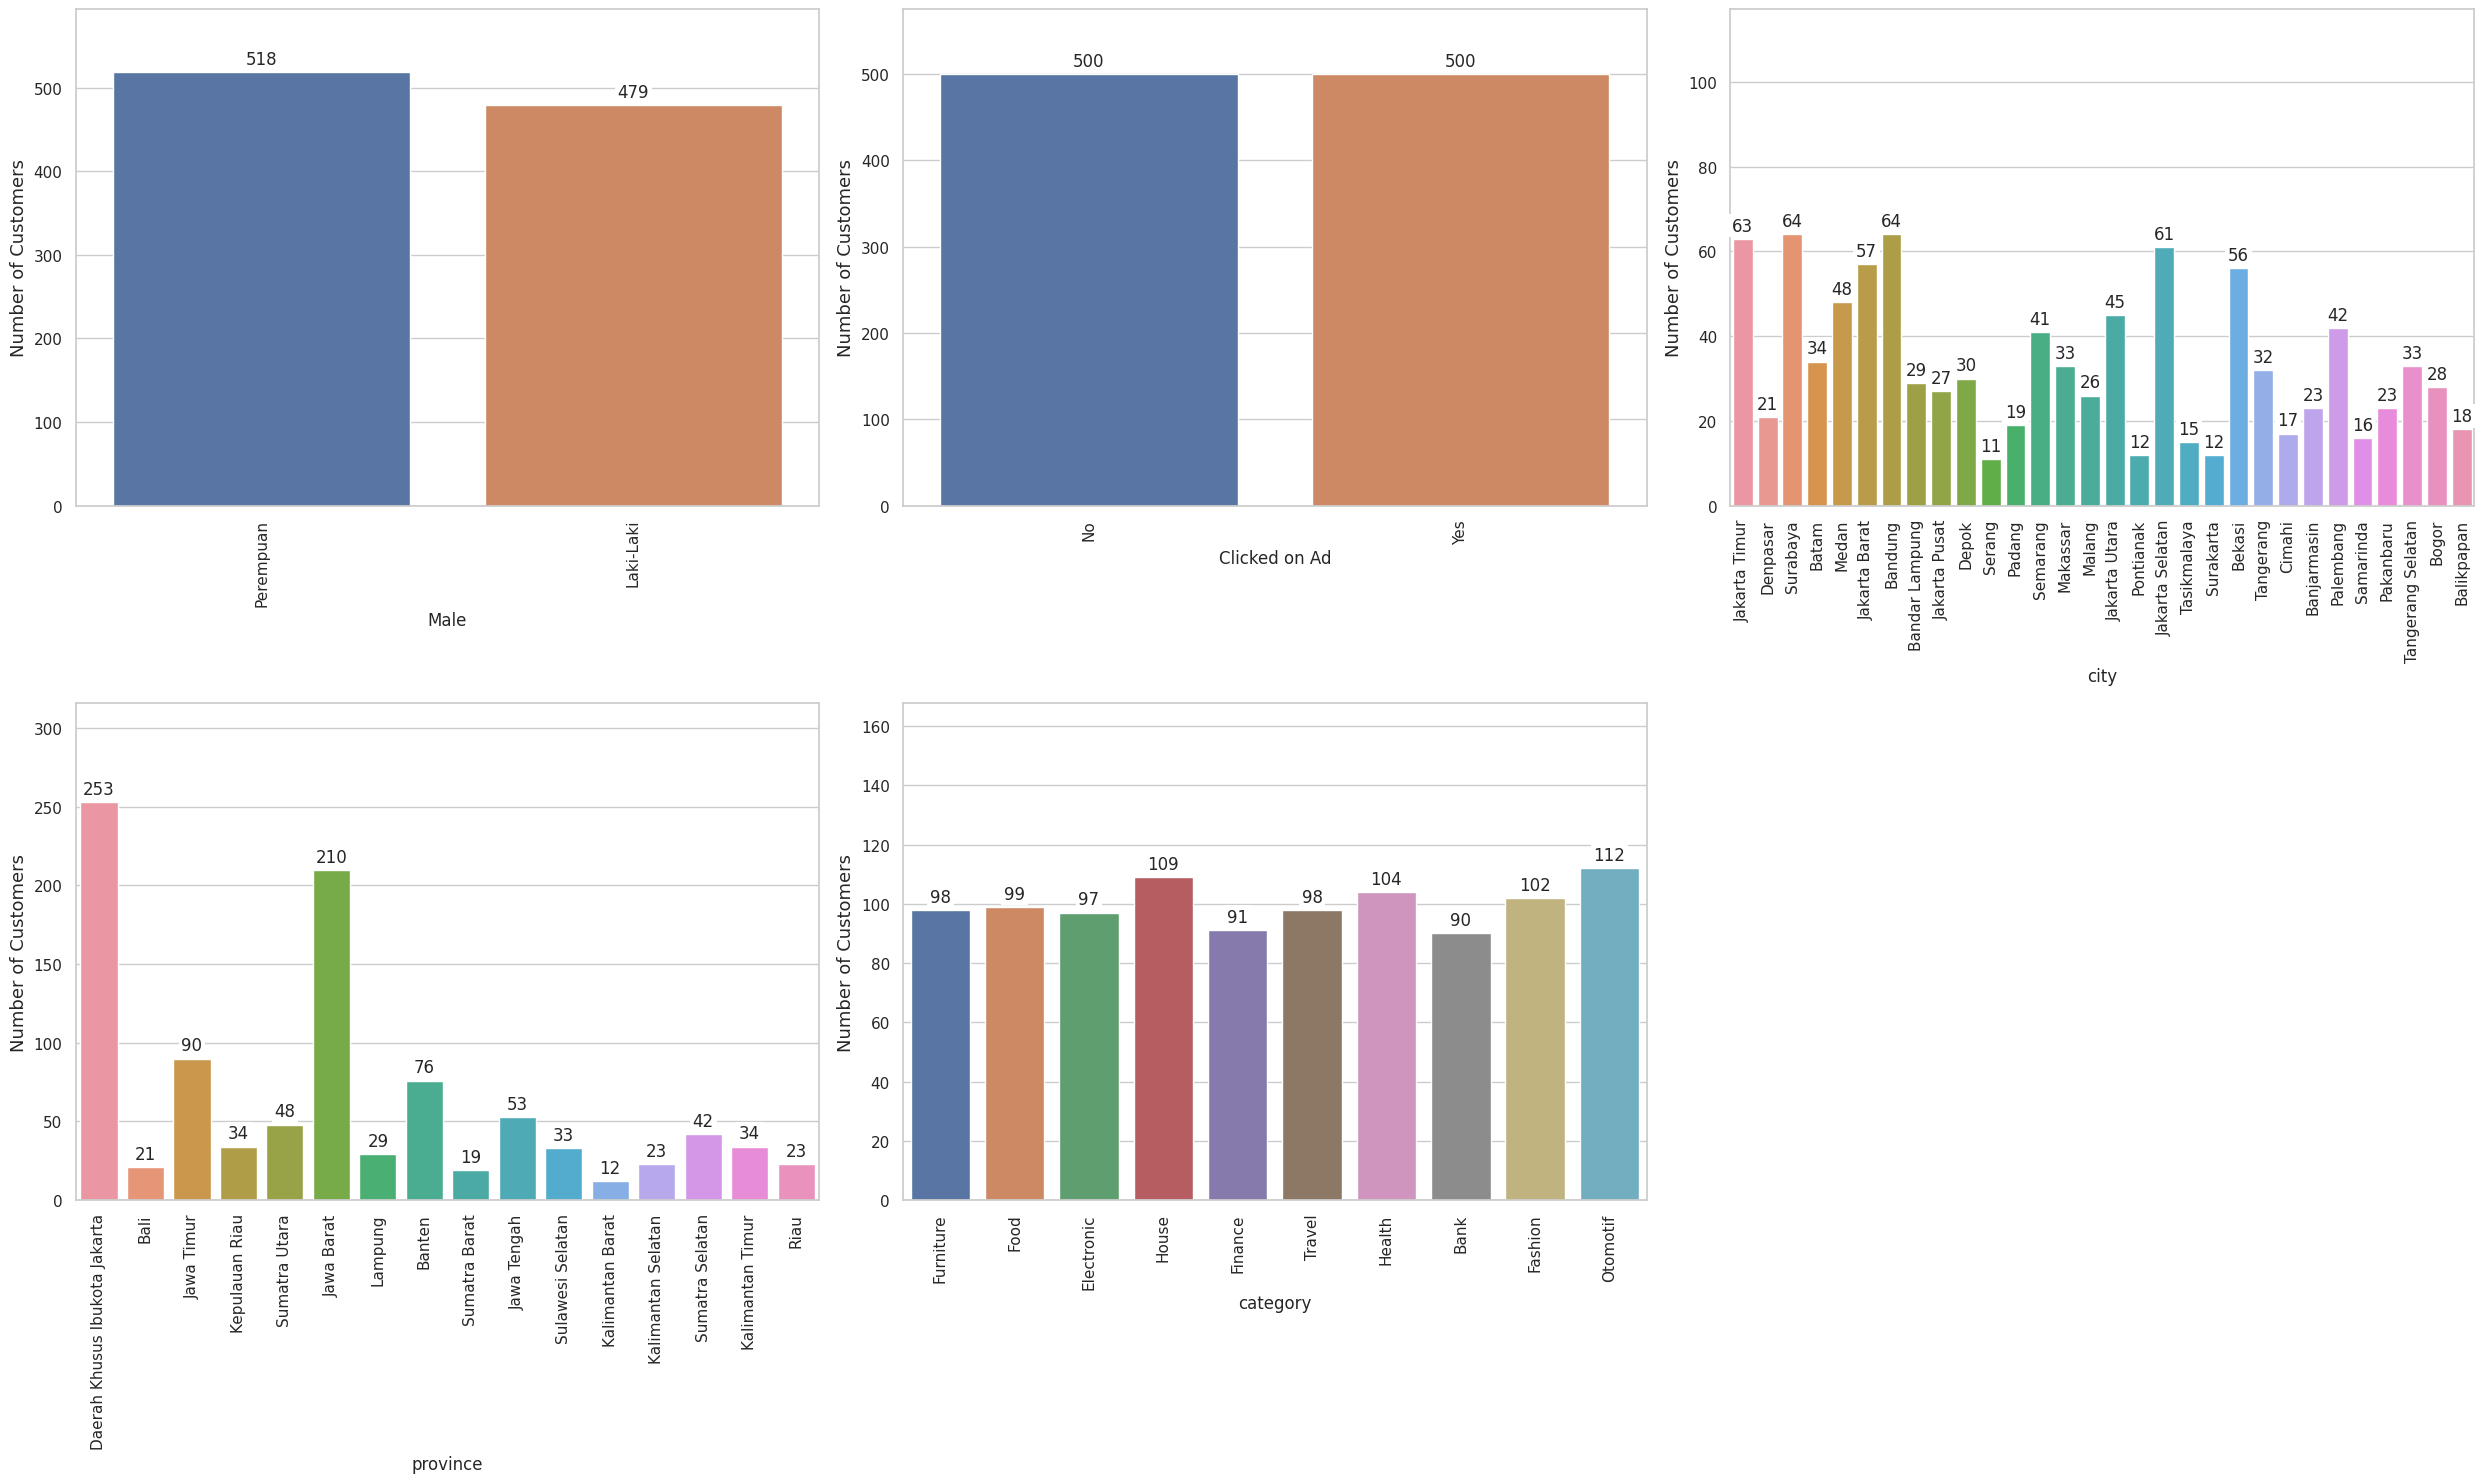

In [ ]:
cat = cat_cols.copy()

n=2
fig = plt.figure(figsize=(25, 15))
for i in range(0, len(cat)):
    fig.add_subplot(n, math.ceil(len(cat)/n), i+1)
    bar = sns.countplot(x=df[cat[i]], orient='h')
    if cat[i] not in []:
        for i in bar.patches:
            bar.annotate(int(i.get_height()),
                    xy=(i.get_x() + i.get_width() / 2, i.get_height()),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    bbox=dict(facecolor='white', edgecolor="None", pad=2))
    else :
        plt.xticks([])
    sns.color_palette("YlOrBr")
    plt.xticks(rotation=90)
    y_start, y_end = plt.ylim()
    plt.ylim(0, y_end+50)
    plt.ylabel('Number of Customers',fontsize=13)
    plt.tight_layout()

Observation:
- The number of customers who clicked on the ad is 1000, but in the 'Male' column there are only 997, so this data needs to be checked further.
- 'Jakarta Timur', 'Surabaya', 'Bandung', 'Jakarta Selatan' are the cities that clicked the ad the most with a minimum of 60 and above.
- 'DKI Jakarta' and 'Jawa Barat' are the dominant provinces with a value of 200 and above.
- While for the category column, all values are relatively balanced.

## Multivariate Analysis

<Axes: >

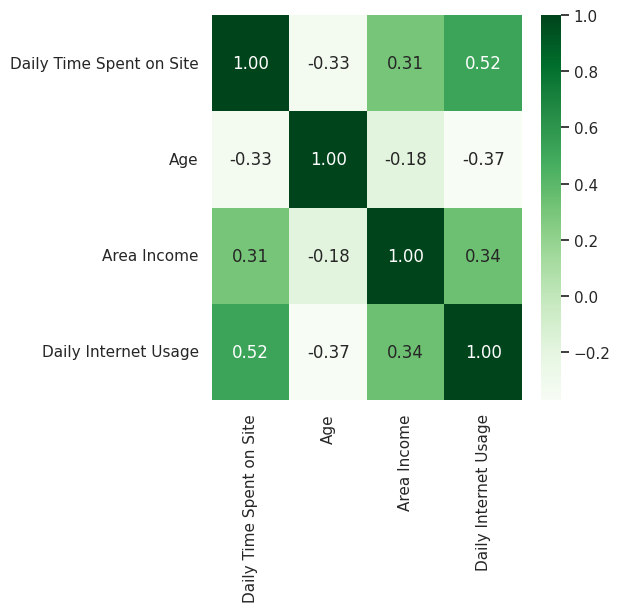

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), cmap='Greens', annot=True, fmt='.2f')

### Pair Plot

<Figure size 1500x1500 with 0 Axes>

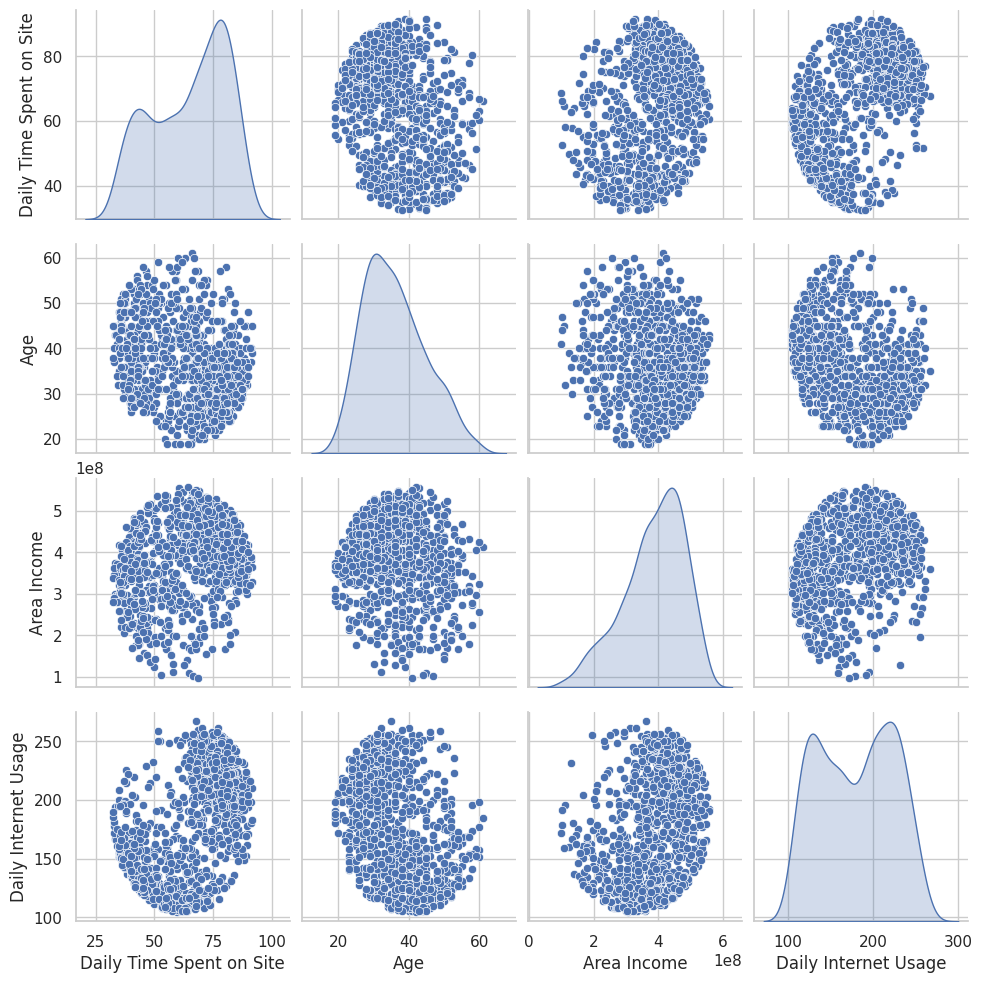

In [ ]:
plt.figure(figsize=(15,15))
sns.pairplot(df[num_cols], diag_kind='kde')

## Bivariate Analysis

Text(0.5, 1, 'Distribusi Umur Terhadap Waktu Penggunaan Website dan Internet')

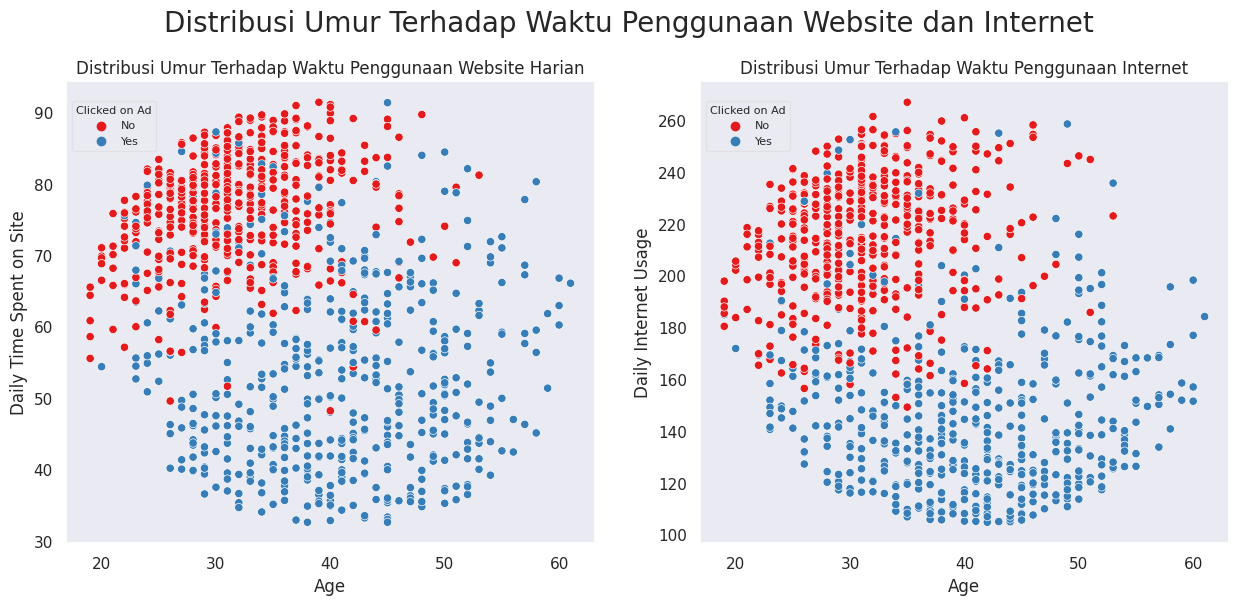

In [ ]:
sns.set_theme(style='dark', palette='Set1')
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot( data=df, x='Age', y='Daily Time Spent on Site', hue='Clicked on Ad' )
plt.legend(title='Clicked on Ad', bbox_to_anchor=(0, 0.97), loc='upper left',framealpha=0.3, fontsize=8,title_fontsize=8)
plt.title('Distribusi Umur Terhadap Waktu Penggunaan Website Harian')

plt.subplot(1,2,2)
sns.scatterplot( data=df, x='Age', y='Daily Internet Usage', hue='Clicked on Ad' )
plt.legend(title='Clicked on Ad', bbox_to_anchor=(0, 0.97), loc='upper left',framealpha=0.3, fontsize=8,title_fontsize=8)
plt.title('Distribusi Umur Terhadap Waktu Penggunaan Internet')
plt.suptitle('Distribusi Umur Terhadap Waktu Penggunaan Website dan Internet', fontsize=20, y=1)

Text(0.5, 1.05, 'Distribusi Waktu Penggunaan Internet \nTerhadap Waktu Penggunaan Website')

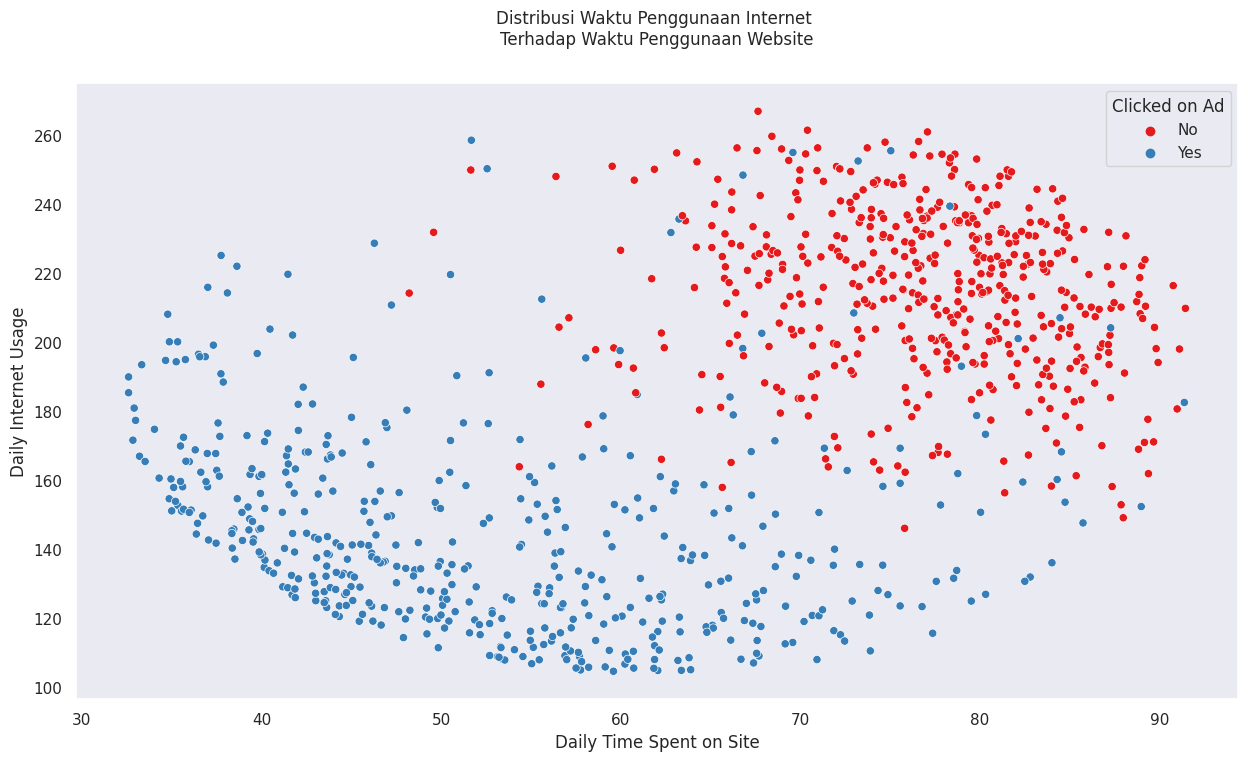

In [ ]:
sns.scatterplot( data=df, x='Daily Time Spent on Site', y='Daily Internet Usage', hue='Clicked on Ad' )
plt.title('Distribusi Waktu Penggunaan Internet \nTerhadap Waktu Penggunaan Website', y=1.05)

Text(0.5, 0.98, 'Category Ads Dengan Jumlah Clicked Terbanyak')

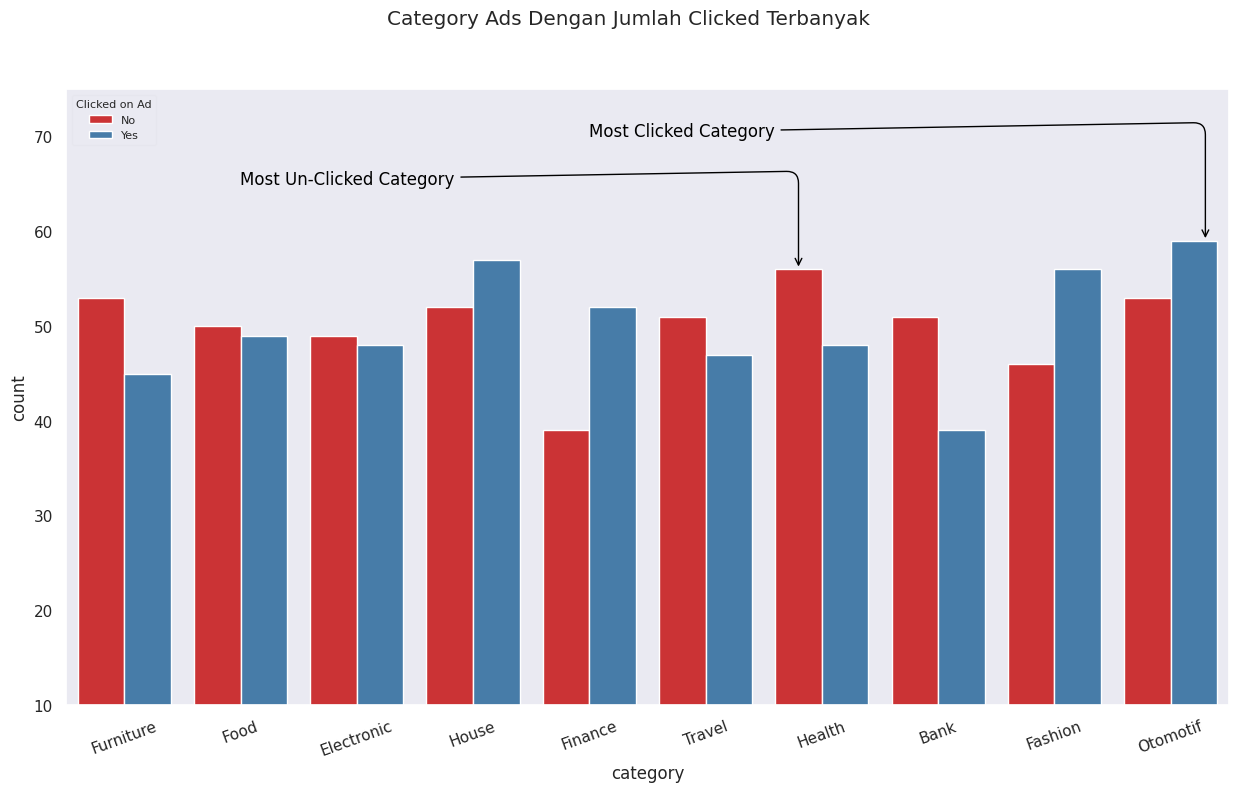

In [ ]:
max_clicked_category = df[df['Clicked on Ad']=='Yes'][['category']].value_counts().max()
max_unclicked_category = df[df['Clicked on Ad']=='No'][['category']].value_counts().max()

sns.set_theme(style='dark', palette='Set1')
sns.countplot(data=df, x='category', hue='Clicked on Ad')
plt.ylim(10,75)
plt.xticks(rotation=20)
plt.legend(title='Clicked on Ad', bbox_to_anchor=(0, 1), loc='upper left',framealpha=0.1, fontsize=8,title_fontsize=8)
plt.annotate(xy=(9.3,max_clicked_category),xytext=(4,70), text='Most Clicked Category',
              arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=1,angleB=90,rad=12", color='black'),color='black')

plt.annotate(xy=(5.8,max_unclicked_category),xytext=(1,65), text='Most Un-Clicked Category',
              arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=1,angleB=90,rad=12", color='black'),color='black')

plt.suptitle('Category Ads Dengan Jumlah Clicked Terbanyak')

# **DATA PREPROCESSING**

### Drop Missing Values

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 963 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  963 non-null    float64
 1   Age                       963 non-null    int64  
 2   Area Income               963 non-null    float64
 3   Daily Internet Usage      963 non-null    float64
 4   Male                      963 non-null    object 
 5   Timestamp                 963 non-null    object 
 6   Clicked on Ad             963 non-null    object 
 7   city                      963 non-null    object 
 8   province                  963 non-null    object 
 9   category                  963 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 82.8+ KB


## Extract Datetime

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [ ]:
df['Month'] = df['Timestamp'].dt.month

In [ ]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Month
0,68.950,35,432837300,256.090,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,3
1,80.230,31,479092950.000,193.770,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food,4
2,69.470,26,418501580,236.500,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic,3
3,74.150,29,383643260,245.890,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House,1
4,68.370,35,517229930.000,225.580,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance,6
5,59.990,23,418330920,226.740,Laki-Laki,2016-05-19 14:30:00,No,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Travel,5
6,88.910,33,376969950,208.360,Perempuan,2016-01-28 20:59:00,No,Bandung,Jawa Barat,Electronic,1
7,66,48,172153310,131.760,Laki-Laki,2016-03-07 01:40:00,Yes,Bandar Lampung,Lampung,Health,3
8,74.530,30,482034000,221.510,Laki-Laki,2016-04-18 09:33:00,No,Batam,Kepulauan Riau,Bank,4
9,69.880,20,389496240,183.820,Laki-Laki,2016-07-11 01:42:00,No,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,Health,7


## Remove Outliers

In [ ]:
print('Data sebelum Remove Outlier : ',df.shape)
q1 = df['Area Income'].quantile(0.25)
q3 = df['Area Income'].quantile(0.75)
iqr = q3-q1
low_limit = q1 - (1.5*iqr)
high_limit = q3 + (1.5*iqr)
df = df[(df['Area Income']>low_limit) & (df['Area Income']<high_limit) ]
print('Data setelah Remove Outlier : ',df.shape)

Data sebelum Remove Outlier :  (963, 11)
Data setelah Remove Outlier :  (955, 11)


## Split Data

In [ ]:
from sklearn.model_selection import train_test_split

# splitting tha data
df_train, df_test = train_test_split(df, test_size=0.25, stratify=df[['Clicked on Ad']], random_state=42)
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

print(df_train.shape)
print(df_test.shape)

(716, 11)
(239, 11)


In [ ]:
df_tr = df_train.copy()
df_tr["dtype"] = "train"

df_te = df_test.copy()
df_te["dtype"] = "test"

df_all = pd.concat([df_tr, df_te]).reset_index(drop=True)
df_all.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Month,dtype
0,72.230,48,369154310,115.350,Perempuan,2016-07-17 01:13:00,Yes,Bandar Lampung,Lampung,Fashion,7,train
1,43.670,31,179804380,166.290,Laki-Laki,2016-02-28 06:41:00,Yes,Semarang,Jawa Tengah,House,2,train
2,47.530,30,232806630,135.180,Perempuan,2016-04-03 05:10:00,Yes,Bandung,Jawa Barat,Food,4,train
3,75.190,31,234517990,245.760,Laki-Laki,2016-06-16 18:04:00,No,Bogor,Jawa Barat,House,6,train
4,80.310,44,394568160,127.070,Perempuan,2016-04-18 15:54:00,Yes,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Otomotif,4,train


# **FEATURE ENGINEERING/EXTRACTION**

## Create Age Group Column

In [ ]:
def age_group(x):
    if x > 45:
        grup = 'Tua'
    elif x > 30:
        grup = 'Dewasa'
    else:
        grup = 'Remaja'

    return grup

df_all['Age_group'] = df_all["Age"].apply(lambda x: age_group(x))

In [ ]:
df_all.rename(columns = {'Male':'Gender'},inplace=True)

In [ ]:
df_all.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,category,Month,dtype,Age_group
0,72.230,48,369154310,115.350,Perempuan,2016-07-17 01:13:00,Yes,Bandar Lampung,Lampung,Fashion,7,train,Tua
1,43.670,31,179804380,166.290,Laki-Laki,2016-02-28 06:41:00,Yes,Semarang,Jawa Tengah,House,2,train,Dewasa
2,47.530,30,232806630,135.180,Perempuan,2016-04-03 05:10:00,Yes,Bandung,Jawa Barat,Food,4,train,Remaja
3,75.190,31,234517990,245.760,Laki-Laki,2016-06-16 18:04:00,No,Bogor,Jawa Barat,House,6,train,Dewasa
4,80.310,44,394568160,127.070,Perempuan,2016-04-18 15:54:00,Yes,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Otomotif,4,train,Dewasa


In [ ]:
log_cols = ['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Month']

# **FEATURE TRANSFORMATION**

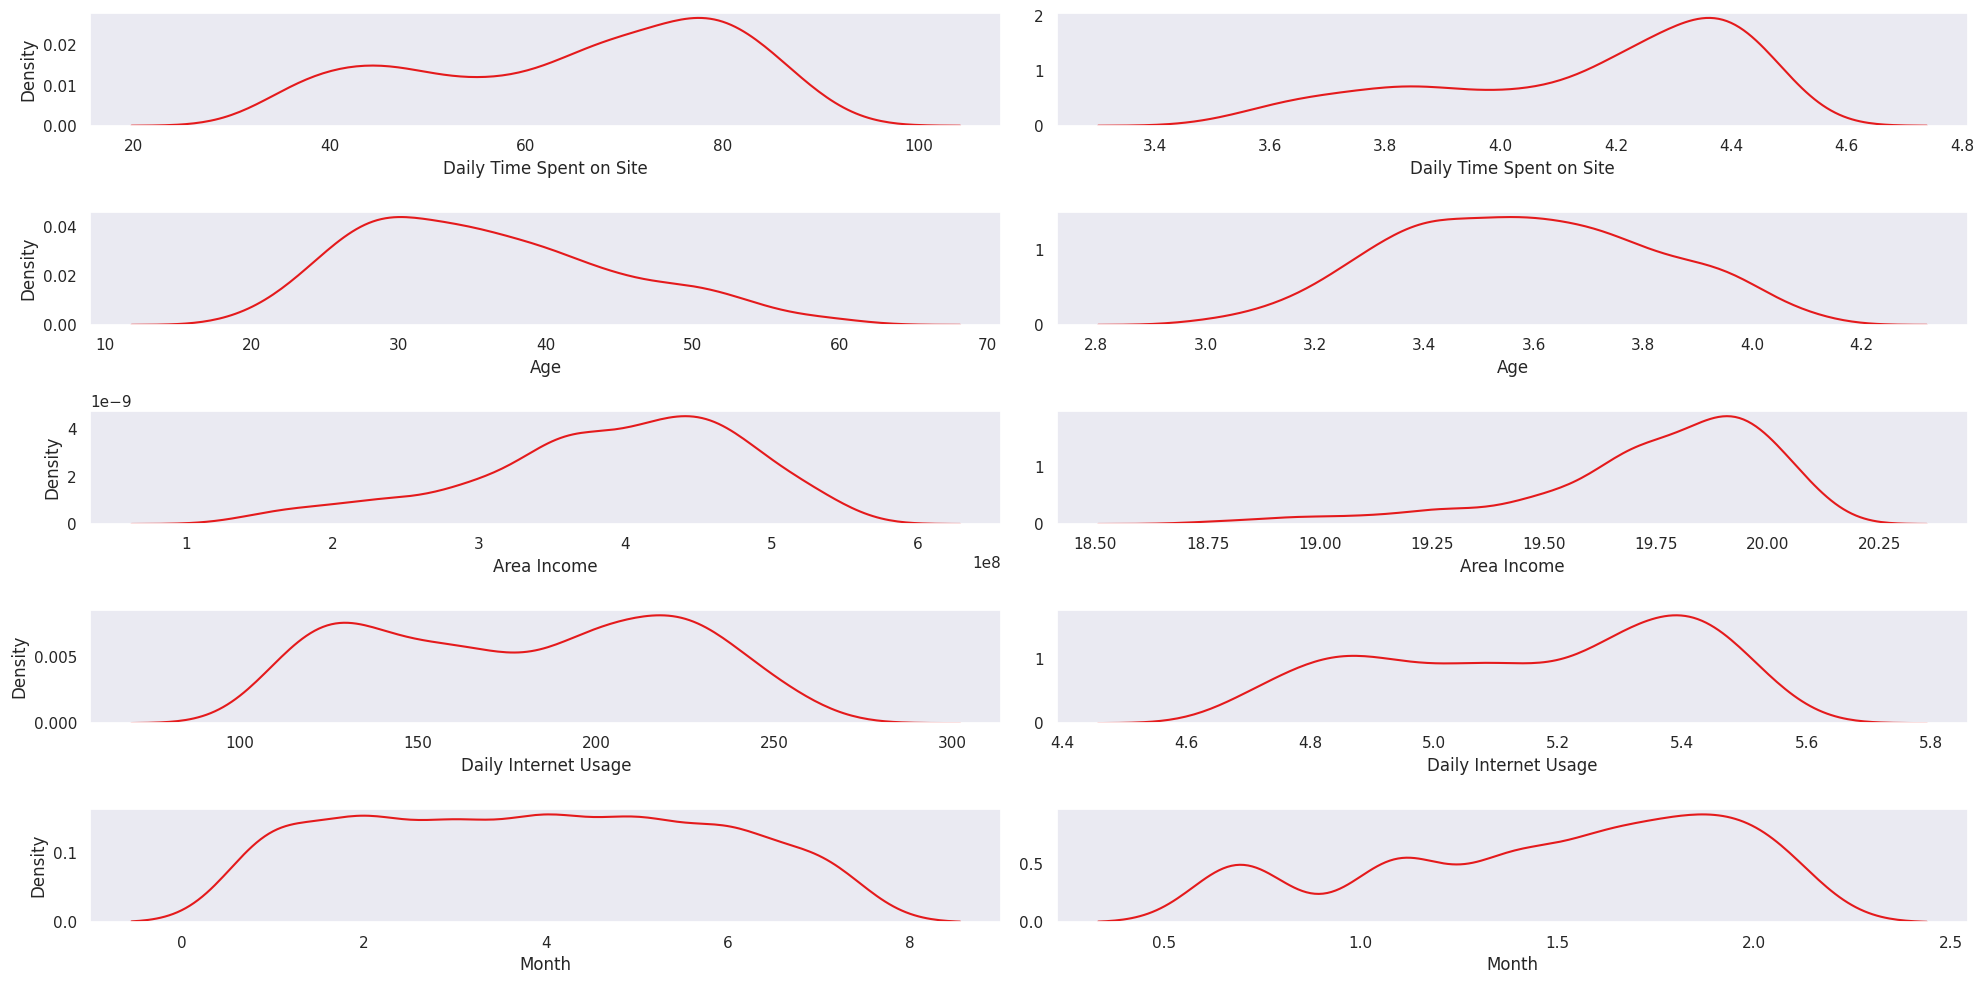

In [ ]:
fig, ax = plt.subplots(len(log_cols),2,figsize=(20,10))
for i in range(0,len(log_cols)):
    kde1 = sns.kdeplot(df_train[log_cols[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(np.log(df_train[log_cols[i]]+1), ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

# **FEATURE ENCODING**

In [ ]:
df_all['Gender'] = np.where(df_all['Gender']=='Laki-Laki', 1, 0)

In [ ]:
df_all['Clicked on Ad']	= np.where(df_all['Clicked on Ad']=='Yes', 1, 0)

In [ ]:
map_age = {
    'Remaja' : 0,
    'Dewasa' : 1,
    'Tua' : 2,
}

df_all['Age_group'] = df_all['Age_group'].map(map_age)

In [ ]:
df_all = pd.get_dummies(data=df_all, columns=['category'])

In [ ]:
df_train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Month
0,72.230,48,369154310,115.350,Perempuan,2016-07-17 01:13:00,Yes,Bandar Lampung,Lampung,Fashion,7
1,43.670,31,179804380,166.290,Laki-Laki,2016-02-28 06:41:00,Yes,Semarang,Jawa Tengah,House,2
2,47.530,30,232806630,135.180,Perempuan,2016-04-03 05:10:00,Yes,Bandung,Jawa Barat,Food,4
3,75.190,31,234517990,245.760,Laki-Laki,2016-06-16 18:04:00,No,Bogor,Jawa Barat,House,6
4,80.310,44,394568160,127.070,Perempuan,2016-04-18 15:54:00,Yes,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Otomotif,4


In [ ]:
df_train = df_all[df_all["dtype"] == "train"].copy()
df_train.drop("dtype", axis=1, inplace=True)
df_train.reset_index(drop=True, inplace=True)

df_test = df_all[df_all["dtype"] == "test"].copy()
df_test.drop("dtype", axis=1, inplace=True)
df_test.reset_index(drop=True, inplace=True)

# **MODELING**

<Axes: >

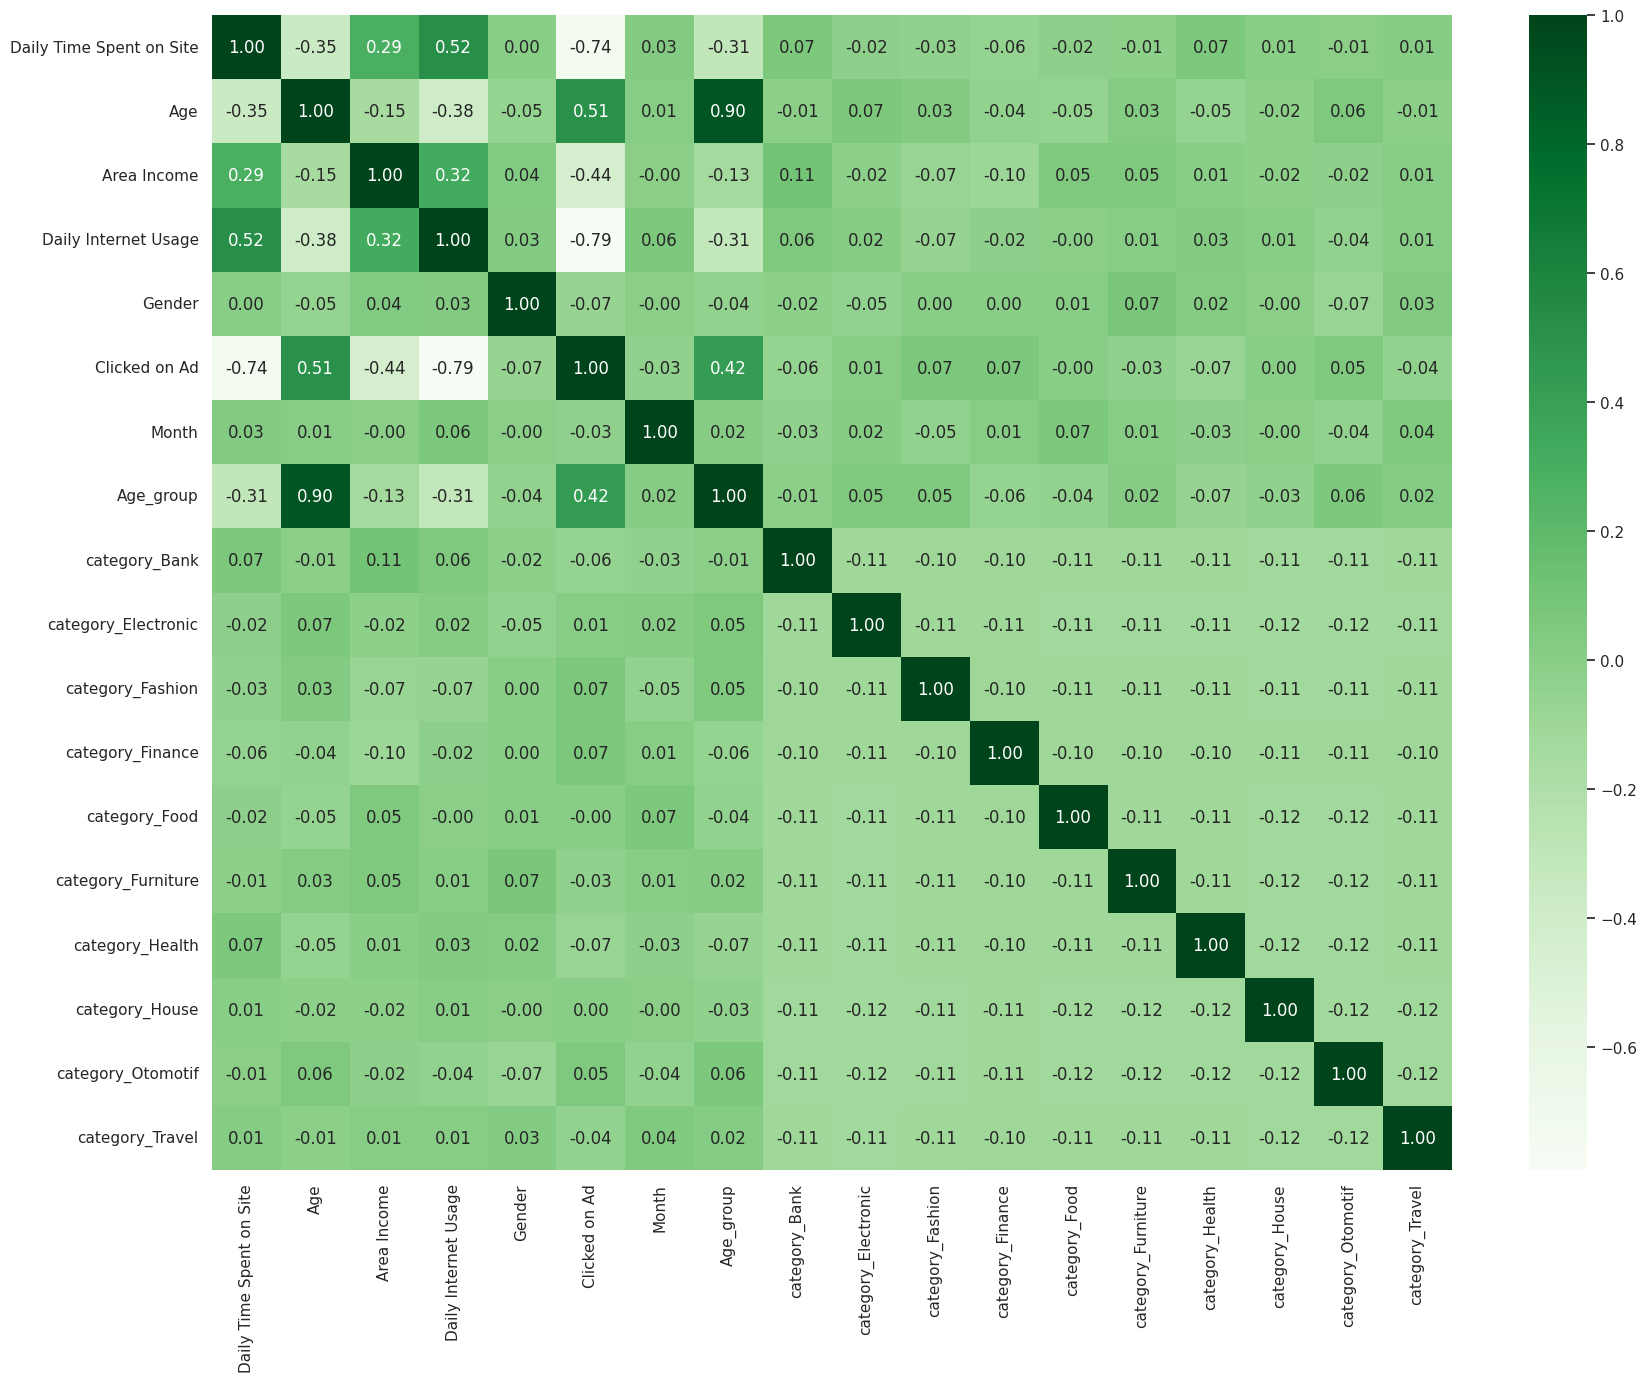

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df_train.corr(), cmap='Greens', annot=True, fmt='.2f')

In [ ]:
df_all.sample()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,Month,dtype,Age_group,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
944,67.760,31,463238790,242.590,0,2016-05-24 17:42:00,0,Samarinda,Kalimantan Timur,5,test,1,0,0,1,0,0,0,0,0,0,0


In [ ]:
df_selection = df_all[['Daily Time Spent on Site','Age','Age_group','Area Income','Gender','Daily Internet Usage','Clicked on Ad','Month']]
df_selection.head(3)

,Daily Time Spent on Site,Age,Age_group,Area Income,Gender,Daily Internet Usage,Clicked on Ad,Month
0,72.230,48,2,369154310,0,115.350,1,7
1,43.670,31,1,179804380,1,166.290,1,2
2,47.530,30,0,232806630,0,135.180,1,4


In [ ]:
X = df_selection.drop(columns='Clicked on Ad', axis=1)
y = df_selection[['Clicked on Ad']]

column = X.columns.values
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X[column] = SS.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)

In [ ]:
print('X_train shape\t: ', X_train.shape)
print('X_test shape\t: ', X_test.shape)
print('y_train shape\t: ', y_train.shape)
print('y_test shape\t: ', y_test.shape)

X_train shape	:  (716, 7)
X_test shape	:  (239, 7)
y_train shape	:  (716, 1)
y_test shape	:  (239, 1)


## Modeling with Normalization

In [ ]:
|from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate,GridSearchCV, RandomizedSearchCV

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns).reset_index()
    # ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    # ax.invert_yaxis()
    feat_importances.columns = ['feature', 'coef']
    feat_importances.sort_values(by='coef', ascending=False,inplace=True)
    sns.barplot(y=feat_importances['feature'], x=feat_importances['coef'])

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')
    # return feat_importances

In [ ]:
def eval(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_pred_proba_test = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    # crosval_precision = cross_validate(model, X, y, cv=5, scoring='precision', return_train_score=True)
    crosval_accuracy = cross_validate(model, X, y, cv=5, scoring='accuracy', return_train_score=True)

    eval_metrix=pd.DataFrame({  'Matrics':["Accuracy","Recal","Precision","F1-Score","Roc_Auc","Accuracy (crossval)"],
                                'y_train_pred':[accuracy_score(y_train_pred,y_train),
                                                recall_score(y_train_pred,y_train),
                                                precision_score(y_train_pred,y_train),
                                                f1_score(y_train_pred,y_train),
                                                roc_auc_score(y_train, y_pred_proba_train[:, 1]),
                                                # crosval_precision['train_score'].mean(),
                                                crosval_accuracy['train_score'].mean(),
                                                ],

                                'y_test_pred':[ accuracy_score(y_test_pred,y_test),
                                                recall_score(y_test_pred,y_test),
                                                precision_score(y_test_pred,y_test),
                                                f1_score(y_test_pred,y_test),
                                                roc_auc_score(y_test, y_pred_proba_test[:, 1]),
                                                # crosval_precision['test_score'].mean(),
                                                crosval_accuracy['test_score'].mean()
                                                ]

                })
    return eval_metrix

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=24)
lr.fit(X=X_train, y=y_train)
matrics_lr = eval(lr)
matrics_lr

,Matrics,y_train_pred,y_test_pred
0,Accuracy,0.971,0.967
1,Recal,0.977,0.983
2,Precision,0.963,0.951
3,F1-Score,0.970,0.967
4,Roc_Auc,0.992,0.993
5,Accuracy (crossval),0.971,0.969


In [ ]:
accuracy_lr = matrics_lr
accuracy_lr = accuracy_lr[accuracy_lr['Matrics']=='Accuracy (crossval)']
accuracy_lr

,Matrics,y_train_pred,y_test_pred
5,Accuracy (crossval),0.971,0.969


### Feature Importance

<Axes: xlabel='coef', ylabel='feature'>

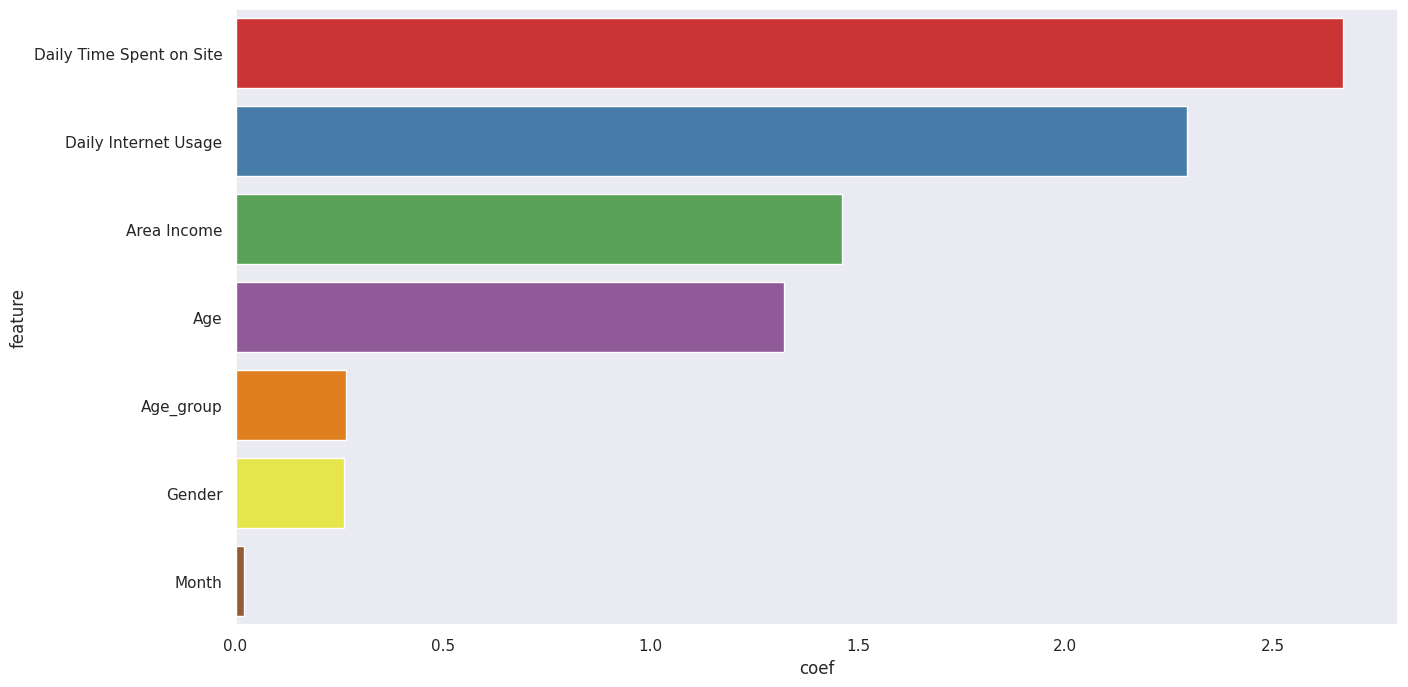

In [ ]:
# Feature Importance
coef = lr.coef_[0]
feature = X_train.columns
feature_importance = pd.DataFrame(data=abs(coef), index=feature).reset_index()
feature_importance.columns = ['feature', 'coef']
feature_importance.sort_values(by='coef', ascending=False,inplace=True)
sns.barplot(y=feature_importance['feature'], x=feature_importance['coef'])

In [ ]:
# Hyperparameter Tunning
hyperparameter = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # tipe regularisasi ('l1', 'l2', 'elasticnet', 'none')
    'C': np.logspace(-3, 3, 7),  # nilai inverse dari kekuatan regularisasi (semakin kecil semakin kuat)
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # algoritma yang digunakan
    'multi_class': ['auto', 'ovr', 'multinomial'],  # tipe multiclass ('auto', 'ovr', 'multinomial')
    'max_iter': [100, 200, 300]  # jumlah iterasi maksimum
}
lr = LogisticRegression(random_state=23)
gs = GridSearchCV(lr,hyperparameter,cv=5,scoring='accuracy')
gs.fit(X_train, y_train)
matrics_lr = eval(gs)
matrics_lr

,Matrics,y_train_pred,y_test_pred
0,Accuracy,0.972,0.967
1,Recal,0.988,0.983
2,Precision,0.955,0.951
3,F1-Score,0.971,0.967
4,Roc_Auc,0.990,0.992
5,Accuracy (crossval),0.972,0.965


In [ ]:
gs.best_params_

{'C': 0.1,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'penalty': 'l2',
 'solver': 'newton-cg'}

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X=X_train, y=y_train)
eval(knn)

,Matrics,y_train_pred,y_test_pred
0,Accuracy,0.972,0.954
1,Recal,0.994,1
2,Precision,0.949,0.911
3,F1-Score,0.971,0.953
4,Roc_Auc,0.997,0.988
5,Accuracy (crossval),0.970,0.957


In [ ]:
hyperparameters = {
    'n_neighbors': np.arange(1, 20,2),          # nilai k dari 1 hingga 30
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],   # algoritma yang digunakan
    'leaf_size': [20, 30, 40, 50],
    'p': [1, 2],                             # parameter untuk metrik jarak: 1 untuk Manhattan, 2 untuk Euclidean
}

knn = KNeighborsClassifier()
gs = GridSearchCV(knn, hyperparameters, cv=5, scoring='accuracy')
gs.fit(X_train, y_train)
matrics_knn = eval(gs)
matrics_knn

,Matrics,y_train_pred,y_test_pred
0,Accuracy,0.965,0.958
1,Recal,0.985,1
2,Precision,0.944,0.919
3,F1-Score,0.964,0.958
4,Roc_Auc,0.996,0.988
5,Accuracy (crossval),0.987,0.957


In [ ]:
accuracy_knn = matrics_knn
accuracy_knn = accuracy_knn[accuracy_knn['Matrics']=='Accuracy (crossval)']
accuracy_knn

,Matrics,y_train_pred,y_test_pred
5,Accuracy (crossval),0.987,0.957


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state = 24)
dtree.fit(X=X_train, y=y_train)
eval(dtree)

,Matrics,y_train_pred,y_test_pred
0,Accuracy,1,0.941
1,Recal,1,0.922
2,Precision,1,0.967
3,F1-Score,1,0.944
4,Roc_Auc,1,0.941
5,Accuracy (crossval),1,0.939


In [ ]:
hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [int(x) for x in np.linspace(1, 110, num = 30)] ,
    'min_samples_split': [2, 5, 10, 100],
    'min_samples_leaf': [1, 2, 4, 10, 20, 50],
    'max_features': ['auto', 'sqrt', 'log2'],
    'splitter' : ['best','random']
}
dtree = DecisionTreeClassifier(random_state = 24)
rs_dtree = RandomizedSearchCV(dtree, hyperparameters, cv = 5,scoring = 'accuracy')
rs_dtree.fit(X_train, y_train)
matrics_dt = eval(rs_dtree)
matrics_dt


,Matrics,y_train_pred,y_test_pred
0,Accuracy,0.972,0.941
1,Recal,0.997,0.966
2,Precision,0.946,0.919
3,F1-Score,0.971,0.942
4,Roc_Auc,0.998,0.964
5,Accuracy (crossval),0.978,0.918


### Feature Importance

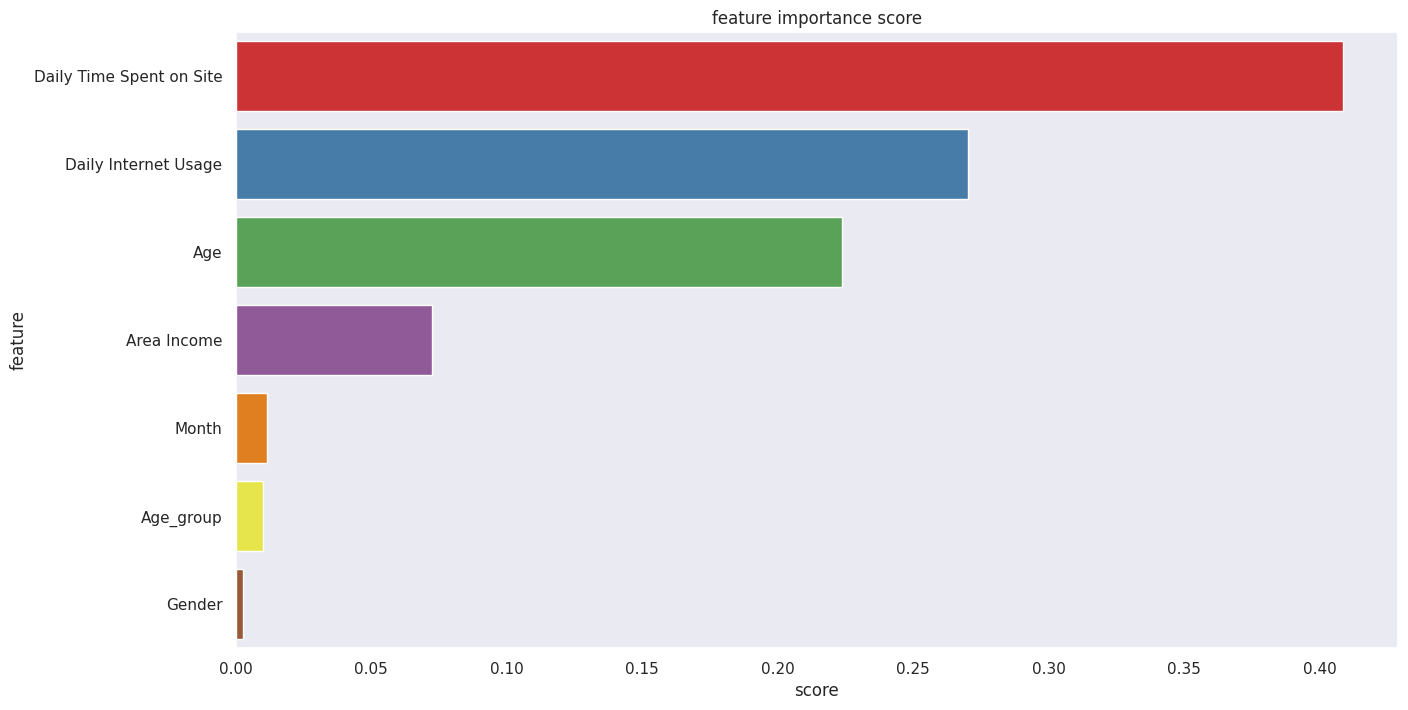

In [ ]:
show_feature_importance(rs_dtree.best_estimator_)

In [ ]:
accuracy_dtree = matrics_dt
accuracy_dtree = accuracy_dtree[accuracy_dtree['Matrics']=='Accuracy (crossval)']
accuracy_dtree

,Matrics,y_train_pred,y_test_pred
5,Accuracy (crossval),0.978,0.918


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=24)
rf.fit(X=X_train, y= y_train)
eval(rf)

,Matrics,y_train_pred,y_test_pred
0,Accuracy,1,0.971
1,Recal,1,0.975
2,Precision,1,0.967
3,F1-Score,1,0.971
4,Roc_Auc,1,0.993
5,Accuracy (crossval),1,0.968


In [ ]:
#Hyperparameter Tunning
hyperparameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10,15,20],
    'min_samples_leaf': [1, 2,3,4,5,6],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}

rf = RandomForestClassifier(random_state=24)
rs_rf = RandomizedSearchCV(rf, hyperparameters, scoring='accuracy', cv=5, random_state=12)
rs_rf.fit(X_train, y_train)
matrics_rf = eval(rs_rf)
matrics_rf

,Matrics,y_train_pred,y_test_pred
0,Accuracy,0.993,0.962
1,Recal,1,0.960
2,Precision,0.986,0.967
3,F1-Score,0.993,0.964
4,Roc_Auc,1.000,0.993
5,Accuracy (crossval),0.988,0.965


### Feature Importance

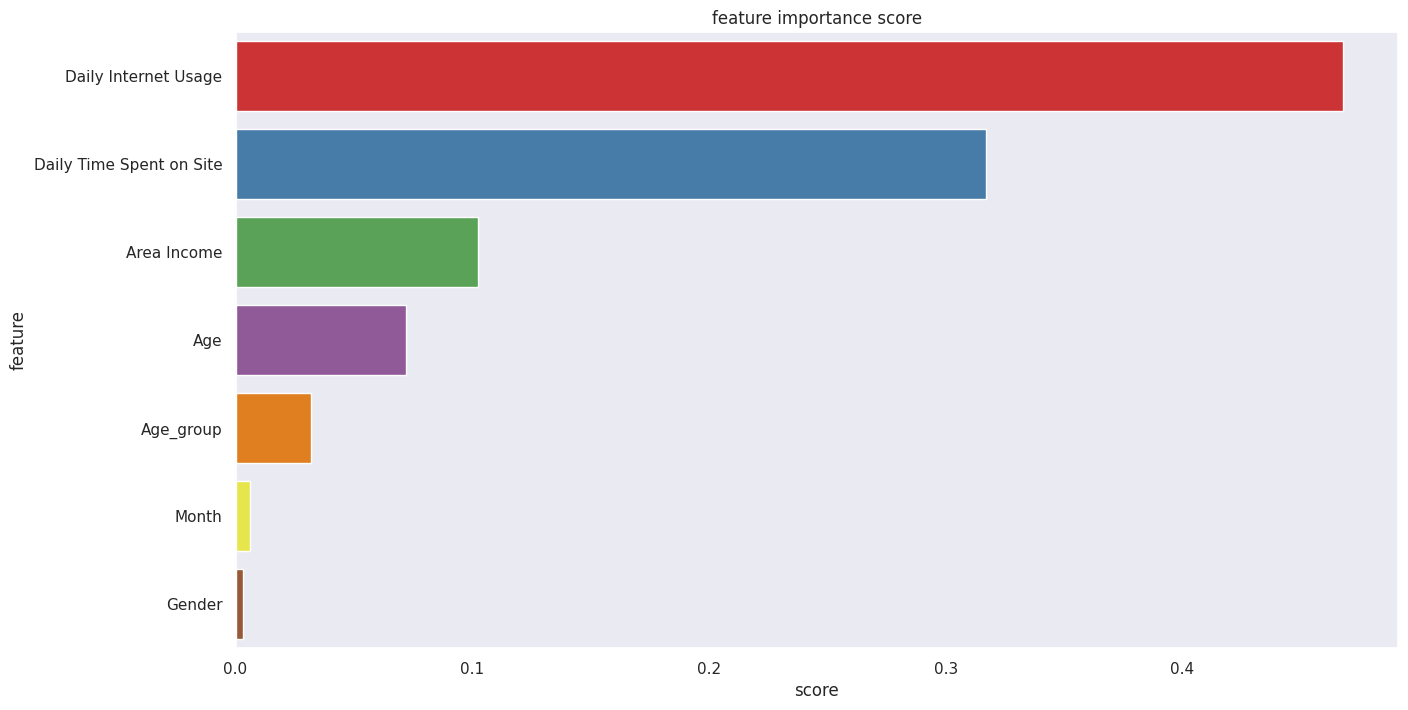

In [ ]:
show_feature_importance(rs_rf.best_estimator_)

In [ ]:
accuracy_rf = matrics_rf
accuracy_rf = accuracy_rf[accuracy_rf['Matrics']=='Accuracy (crossval)']
accuracy_rf

,Matrics,y_train_pred,y_test_pred
5,Accuracy (crossval),0.988,0.965


## Modeling without Normalization

In [ ]:
X2 = df_selection.drop(columns='Clicked on Ad', axis=1)
y2 = df_selection[['Clicked on Ad']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=24)

In [ ]:
def eval2(model):
    y_train_pred = model.predict(X_train2)
    y_test_pred = model.predict(X_test2)
    y_pred_proba_test = model.predict_proba(X_test2)
    y_pred_proba_train = model.predict_proba(X_train2)
    crosval_accuracy = cross_validate(model, X2, y2, cv=5, scoring='accuracy', return_train_score=True)

    eval_metrix=pd.DataFrame({  'Matrics':["Accuracy","Recal","Precision","F1-Score","Roc_Auc","Accuracy (crossval)"],
                                'y_train_pred':[accuracy_score(y_train_pred,y_train2),
                                                recall_score(y_train_pred,y_train2),
                                                precision_score(y_train_pred,y_train2),
                                                f1_score(y_train_pred,y_train2),
                                                roc_auc_score(y_train2, y_pred_proba_train[:, 1]),
                                                # crosval_precision['train_score'].mean(),
                                                crosval_accuracy['train_score'].mean(),
                                                ],

                                'y_test_pred':[ accuracy_score(y_test_pred,y_test2),
                                                recall_score(y_test_pred,y_test2),
                                                precision_score(y_test_pred,y_test2),
                                                f1_score(y_test_pred,y_test2),
                                                roc_auc_score(y_test2, y_pred_proba_test[:, 1]),
                                                # crosval_precision['test_score'].mean(),
                                                crosval_accuracy['test_score'].mean()
                                                ]

                })
    return eval_metrix

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=24)
lr.fit(X=X_train2, y=y_train2)
eval2(lr)

,Matrics,y_train_pred,y_test_pred
0,Accuracy,0.506,0.485
1,Recal,0,0
2,Precision,0,0
3,F1-Score,0,0
4,Roc_Auc,0.770,0.751
5,Accuracy (crossval),0.501,0.501


In [ ]:
accuracy_lr_2 = eval2(lr)
accuracy_lr_2 = accuracy_lr_2[accuracy_lr_2['Matrics']=='Accuracy (crossval)']
accuracy_lr_2

,Matrics,y_train_pred,y_test_pred
5,Accuracy (crossval),0.501,0.501


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X=X_train2, y=y_train2)
eval2(knn)

,Matrics,y_train_pred,y_test_pred
0,Accuracy,0.767,0.661
1,Recal,0.799,0.688
2,Precision,0.706,0.626
3,F1-Score,0.750,0.655
4,Roc_Auc,0.838,0.701
5,Accuracy (crossval),0.758,0.653


In [ ]:
hyperparameters = {
    'n_neighbors': np.arange(1, 20,2),          # nilai k dari 1 hingga 30
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],   # algoritma yang digunakan
    'leaf_size': [20, 30, 40, 50],
    'p': [1, 2],                             # parameter untuk metrik jarak: 1 untuk Manhattan, 2 untuk Euclidean
}

knn = KNeighborsClassifier()
gs = GridSearchCV(knn, hyperparameters, cv=5, scoring='accuracy')
gs.fit(X=X_train2, y=y_train2)
accuracy_knn_2 = eval2(gs)
accuracy_knn_2

,Matrics,y_train_pred,y_test_pred
0,Accuracy,0.718,0.707
1,Recal,0.764,0.791
2,Precision,0.621,0.585
3,F1-Score,0.685,0.673
4,Roc_Auc,0.793,0.742
5,Accuracy (crossval),0.726,0.676


In [ ]:
accuracy_knn_2 = accuracy_knn_2[accuracy_knn_2['Matrics']=='Accuracy (crossval)']
accuracy_knn_2

,Matrics,y_train_pred,y_test_pred
5,Accuracy (crossval),0.726,0.676


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state = 24)
dtree.fit(X=X_train2, y=y_train2)
accuracy_dtree_2 = eval2(dtree)
accuracy_dtree_2

,Matrics,y_train_pred,y_test_pred
0,Accuracy,1,0.941
1,Recal,1,0.922
2,Precision,1,0.967
3,F1-Score,1,0.944
4,Roc_Auc,1,0.941
5,Accuracy (crossval),1,0.939


In [ ]:
hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [int(x) for x in np.linspace(1, 110, num = 30)] ,
    'min_samples_split': [2, 5, 10, 100],
    'min_samples_leaf': [1, 2, 4, 10, 20, 50],
    'max_features': ['auto', 'sqrt', 'log2'],
    'splitter' : ['best','random']
}
dtree = DecisionTreeClassifier(random_state = 24)
rs_dtree = RandomizedSearchCV(dtree, hyperparameters, cv = 5,scoring = 'accuracy')
rs_dtree.fit(X_train2, y_train2)
accuracy_dtree_2 = eval2(rs_dtree)
accuracy_dtree_2

,Matrics,y_train_pred,y_test_pred
0,Accuracy,0.972,0.933
1,Recal,1,0.965
2,Precision,0.944,0.902
3,F1-Score,0.971,0.933
4,Roc_Auc,0.998,0.960
5,Accuracy (crossval),0.944,0.892


In [ ]:
accuracy_dtree_2 = accuracy_dtree_2[accuracy_dtree_2['Matrics']=='Accuracy (crossval)']
accuracy_dtree_2

,Matrics,y_train_pred,y_test_pred
5,Accuracy (crossval),0.944,0.892


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=24)
rf.fit(X=X_train2, y= y_train2)
eval2(rf)

,Matrics,y_train_pred,y_test_pred
0,Accuracy,1,0.971
1,Recal,1,0.975
2,Precision,1,0.967
3,F1-Score,1,0.971
4,Roc_Auc,1,0.993
5,Accuracy (crossval),1,0.968


In [ ]:
#Hyperparameter Tunning
hyperparameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10,15,20],
    'min_samples_leaf': [1, 2,3,4,5,6],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}

rf = RandomForestClassifier(random_state=24)
rs_rf = RandomizedSearchCV(rf, hyperparameters, scoring='accuracy', cv=5, random_state=12)
rs_rf.fit(X=X_train2, y= y_train2)
accuracy_rf_2 = eval2(rs_rf)
accuracy_rf_2

,Matrics,y_train_pred,y_test_pred
0,Accuracy,0.993,0.962
1,Recal,1,0.960
2,Precision,0.986,0.967
3,F1-Score,0.993,0.964
4,Roc_Auc,1.000,0.993
5,Accuracy (crossval),0.988,0.966


In [ ]:
accuracy_rf_2 = accuracy_rf_2[accuracy_rf_2['Matrics']=='Accuracy (crossval)']
accuracy_rf_2

,Matrics,y_train_pred,y_test_pred
5,Accuracy (crossval),0.988,0.966


# **RESULT**

In [ ]:
# Experimen 1 (Dengan Standarisasi)
matrics_eval = pd.concat([accuracy_lr,accuracy_knn,accuracy_dtree,accuracy_rf])
matrics_eval['Matrics'] = ['Logistic Regression','KNeighbors','DecisionTree','RandomForest']
matrics_eval.columns = ['Model_With_Std','Train_accuracy','Test_accuracy']
matrics_eval.reset_index(inplace=True)
matrics_eval.drop('index',axis=1, inplace=True)
matrics_eval

,Model_With_Std,Train_accuracy,Test_accuracy
0,Logistic Regression,0.971,0.969
1,KNeighbors,0.987,0.957
2,DecisionTree,0.978,0.918
3,RandomForest,0.988,0.965


In [ ]:
# Experimen 2 (Tanpa Standarisasi)
matrics_eval2 = pd.concat([accuracy_lr_2,accuracy_knn_2,accuracy_dtree_2,accuracy_rf_2])
matrics_eval2['Matrics'] = ['Logistic Regression','KNeighbors','DecisionTree','RandomForest']
matrics_eval2.columns = ['Model_Without_Std','Train_accuracy','Test_accuracy']
matrics_eval2.reset_index(inplace=True)
matrics_eval2.drop('index',axis=1, inplace=True)
matrics_eval2

,Model_Without_Std,Train_accuracy,Test_accuracy
0,Logistic Regression,0.501,0.501
1,KNeighbors,0.726,0.676
2,DecisionTree,0.944,0.892
3,RandomForest,0.988,0.966


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=24, C=1.0, max_iter=100,multi_class='auto',penalty='l2',solver='liblinear')
lr.fit(X=X, y=y) # Use all data
y_test = lr.predict(X)
print("Model Accuracy : ",accuracy_score(y_test,y))

Model Accuracy :  0.9706806282722513


<Axes: xlabel='coef', ylabel='feature'>

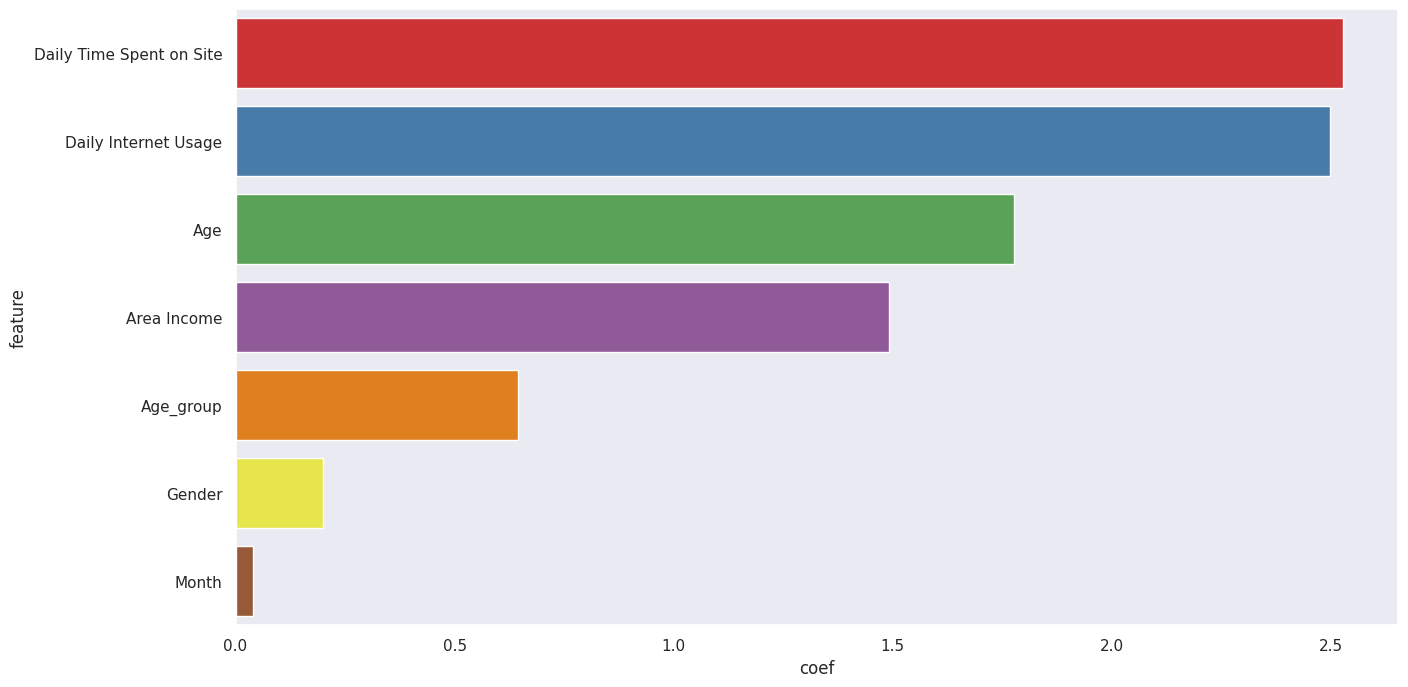

In [ ]:
coef = lr.coef_[0]
feature = X_train.columns
feature_importance = pd.DataFrame(data=abs(coef), index=feature).reset_index()
feature_importance.columns = ['feature', 'coef']
feature_importance.sort_values(by='coef', ascending=False,inplace=True)
sns.barplot(y=feature_importance['feature'], x=feature_importance['coef'])

# **BUSINESS SIMULATION**

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y, y_test)
conf_matrix

array([[470,   8],
       [ 20, 457]])

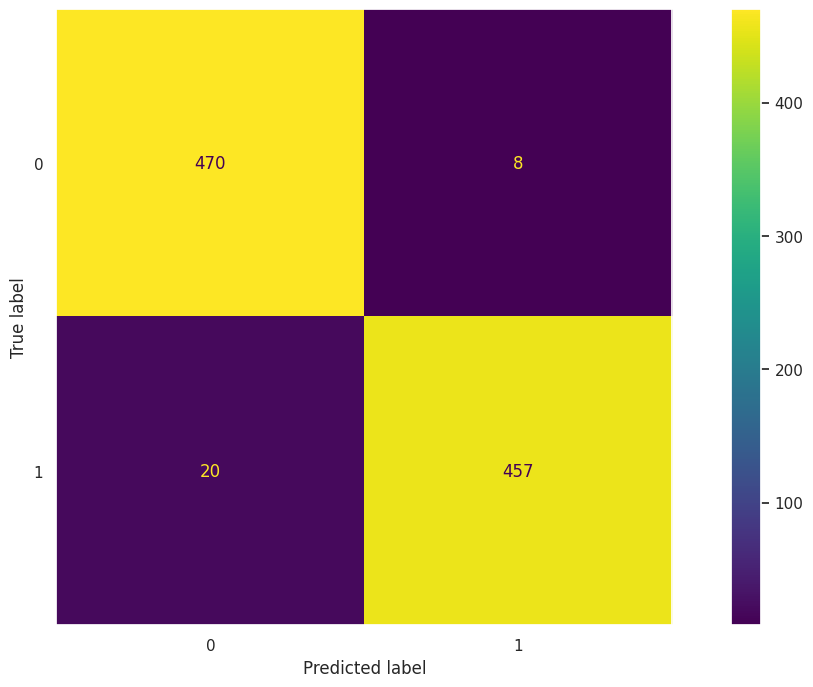

In [ ]:
matrix = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
matrix.plot()

## Conversion Rate

In [ ]:
# Conversion Rate Before Modeling
df_simulation = df_selection.sample(465,random_state=24)
unclicked_ads = df_simulation[df_simulation['Clicked on Ad']==0]['Clicked on Ad'].count()
clicked_ads = df_simulation[df_simulation['Clicked on Ad']==1]['Clicked on Ad'].count()
print("Total Unclicked_ads : ",unclicked_ads)
print("Total Clicked ads : ",clicked_ads)

ctr = round(clicked_ads / (len(df_simulation))*100,2)

print("Clicked True Rate (Before Modelling) : ",ctr,"%")

Total Unclicked_ads :  228
Total Clicked ads :  237
Clicked True Rate (Before Modelling) :  50.97 %


In [ ]:
unclicked_ads_model = 8 # False Positive (Predicted Clicked Ads, but actual data not clicked)
clicked_ads_model = 457 # TP (Predict clicked ads and actual data is clicked)
ctr = round(clicked_ads_model / (len(df_simulation))*100,2)
print("Clicked True Rate (After Modelling) : ",ctr,"%")

Clicked True Rate (After Modelling) :  98.28 %


In [ ]:
cost = 2.32
Total_cost = round(cost * len(df_simulation),2)
print("Total Cost : ",Total_cost,"$")

Total Cost :  1078.8 $


### Revenue & Profit

In [ ]:
#Revenue & Profit before modeling
revenue = 12
Total_revenue = revenue * clicked_ads
Profit = round(Total_revenue - Total_cost,2)
print("Total Revenue (Before Modeling) : ",Total_revenue,"$")
print("Profit (Before Modeling) : ",Profit,"$")

Total Revenue (Before Modeling) :  2844 $
Profit (Before Modeling) :  1765.2 $


In [ ]:
#Revenue & Profit after modeling
revenue = 12
Total_revenue = revenue * clicked_ads_model
Profit = round(Total_revenue - Total_cost,2)
print("Total Revenue (After Modeling) : ",Total_revenue,"$")
print("Profit (After Modeling) : ",Profit,"$")

Total Revenue (After Modeling) :  5484 $
Profit (After Modeling) :  4405.2 $
